Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA, KernelPCA, NMF
from sklearn.manifold import MDS
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_score

Inserting and displaying the dataset

In [2]:
data=pd.read_csv('/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv')
df=pd.DataFrame(data)
print(df.head)

<bound method NDFrame.head of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5

Data Cleaning and Visualization

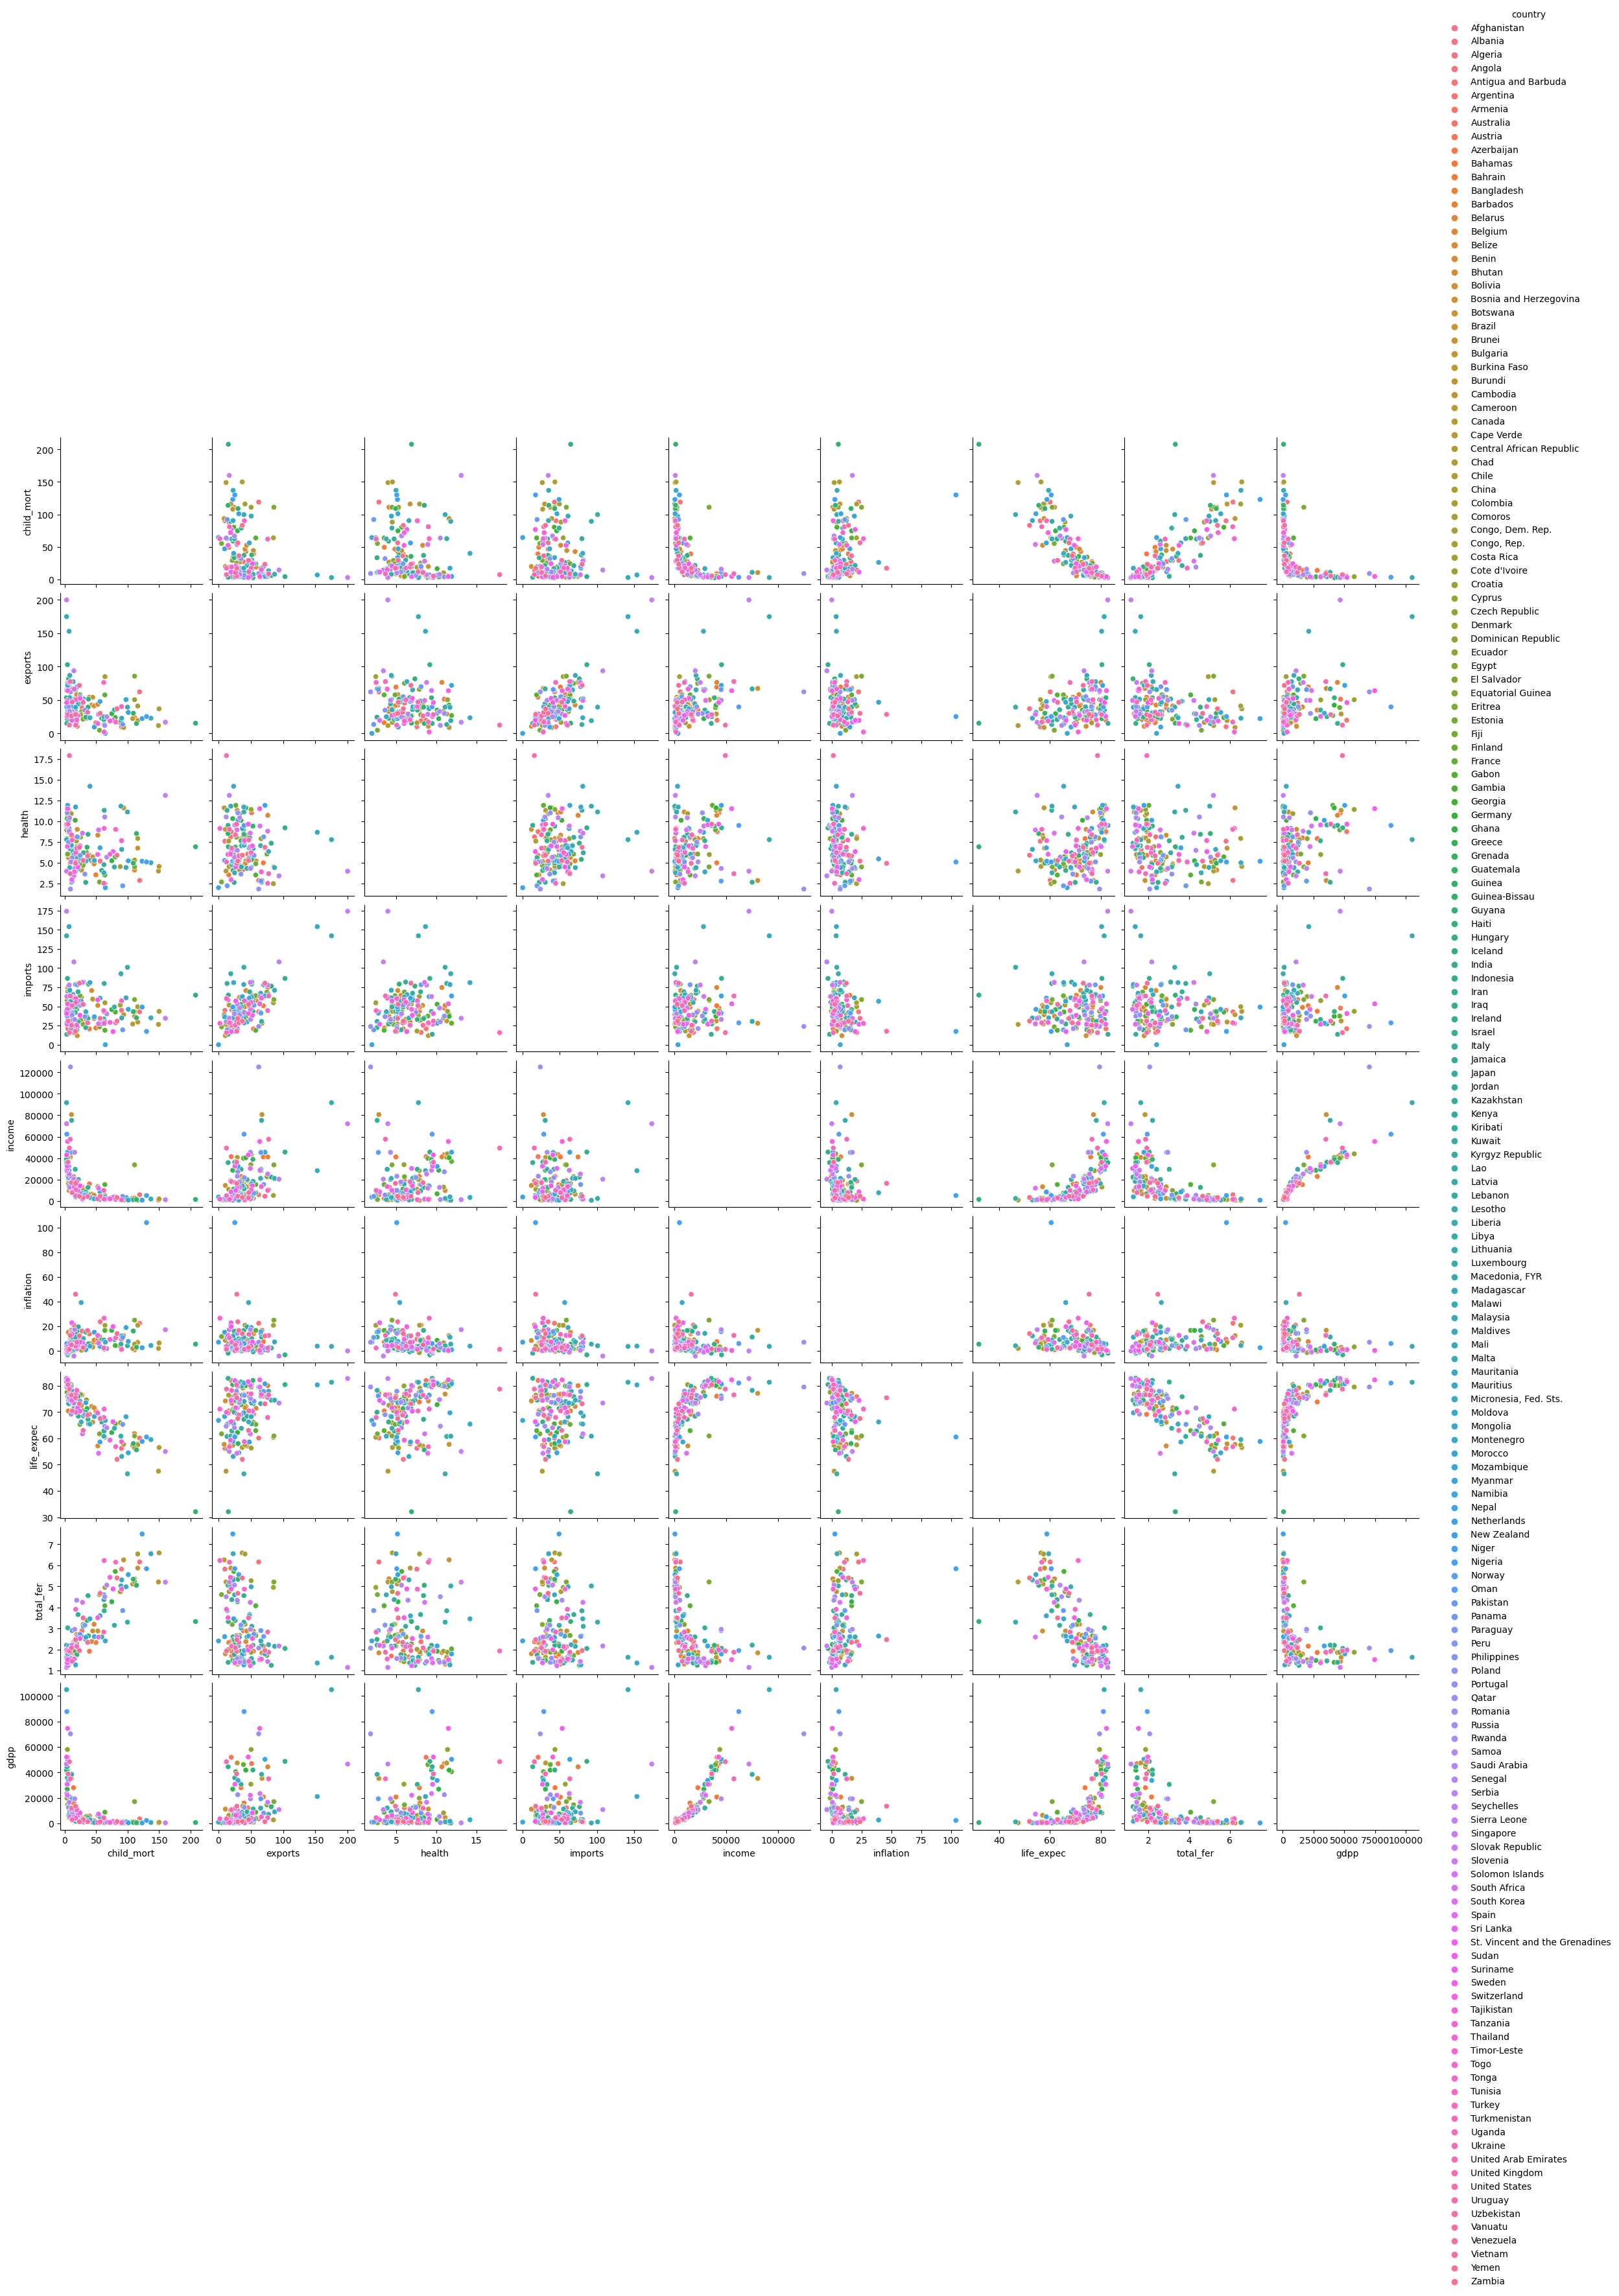

In [3]:
#Separating numeric values from non numeric ones
X=df.iloc[:,1:].values

#Handling missing values
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
X[:,-2:]=imputer.fit_transform(X[:,-2:])

#Data Visualization
sns.pairplot(df, hue='country', height=2.5)

Data Preprocessing

In [4]:
#Dimensionality Reduction
mds=MDS(n_components=6)
X=mds.fit_transform(X)

#Data Standardization
scaler=StandardScaler()
X=scaler.fit_transform(X)

Since the dataset does not contain any Categorical feature of prediction importance (except **Country**, which is not used for prediction), encoding is skipped and implementation of K Means, Hierarchical and DBSCAN algorithms begin from the next step.

1. K Means Clustering

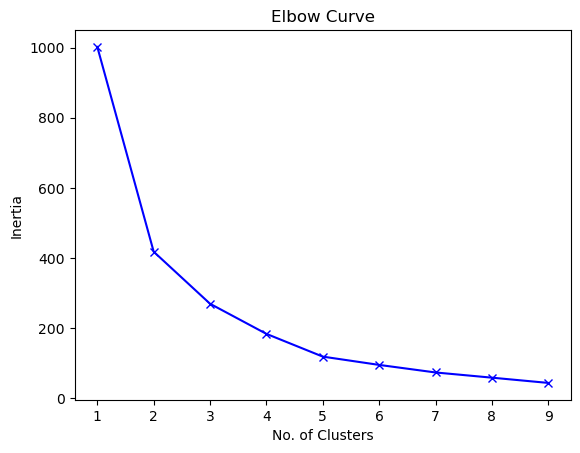

[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
Silhouette Score for K Means clustering:  0.7295455785381803


In [5]:
#Finding optimal value of k using Elbow Method
inertia=[]
list_clusters=list(range(1,10))
for k in list_clusters:
  km=KMeans(n_clusters=k)
  km.fit(X)
  inertia.append(km.inertia_)
plt.plot(list_clusters,inertia,'bx-')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#Here, elbow occurs at k=2. So, K Means algorithm is used with 2 clusters.
kmns=KMeans(n_clusters=2, init='k-means++')
kmns.fit(X)
labels=kmns.labels_
print(labels)

#Calculation of Accuracy using silhouettte score
score=silhouette_score(X,labels)
print("Silhouette Score for K Means clustering: ",score)

2. Hierarchical Agglomerative Clustering

In [6]:
#Hierarchical Agglomerative Clustering
agg=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
agg.fit(X)
agg_labels=agg.labels_
print(labels)

#Accuracy Calculation using silhouette score
agg_score=silhouette_score(X,agg_labels)
print("Silhouette Score for Hierarchical Agglomerative Clustering: ",agg_score)

[0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0]
Silhouette Score for Hierarchical Agglomerative Clustering:  0.7229252735745546


3. Spectral Clustering

In [7]:
#Spectral Clustering
spectral=SpectralClustering(n_clusters=2)
sp_labels=spectral.fit_predict(X)
print(sp_labels)

#Accuracy calculation using Silhouette Score
sp_score=silhouette_score(X,sp_labels)
print("Silhouette Score for Spectral Clustering: ",sp_score)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
Silhouette Score for Spectral Clustering:  0.7115393967609114


It can be clearly seen that out of these 3 clustering algorithms, the **K Means algorithm** (with elbow mwthod) performs the best, with the highest Silhouette Score and reasonable Culster Density. So, only the labels of the K Means method will be named, in this step.

In [8]:
#Assigning Cluster names to corresponding labels
str_labels=labels.astype(str)
str_labels=np.where(str_labels=='0','Priority','Non-Priority')

#Adding a new feature to the dataset, using these cluster names
df['Aid_Level']=str_labels
print(df.head)
df.to_csv('Output.csv', index=False)

<bound method NDFrame.head of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp Aid_Level  
0         9.44        56

Finding insights and output analysis

In [9]:
#Finding no. of countries for each type of aid level
unique_elements,counts=np.unique(str_labels,return_counts=True)
for ele,count in zip(unique_elements,counts):
  print(f"There are {count} countries of aid level {ele}.")

#Finding the features which got importance in contribution
num=df.iloc[:,1:9]
m1=MDS(n_components=6)
num=m1.fit_transform(num)
imp_cols=pd.DataFrame(num, columns=['MDS1', 'MDS2','MDS3','MDS4','MDS5','MDS6'])
print(imp_cols)

There are 28 countries of aid level Non-Priority.
There are 139 countries of aid level Priority.
             MDS1         MDS2         MDS3         MDS4         MDS5  \
0    11132.571179 -8536.362973 -2612.562264  4325.600645  3938.636779   
1     5162.235515 -3831.738463 -1097.326704  2457.531051  1681.453196   
2     2962.579145 -2229.879027  -707.472750  1720.362634   881.358781   
3     8119.822089 -6061.298436 -1808.407639  3319.912517  2734.411371   
4    -1750.929609  1050.636848    89.654362   156.203828  -586.105973   
..            ...          ...          ...          ...          ...   
162  10191.734911 -7752.083681 -2360.611329  3966.564692  3597.818034   
163    199.824853  -335.859719  -354.634956   818.085380     3.489697   
164   9049.852159 -6916.131915 -2149.353901  3651.876907  3122.766490   
165   9073.427649 -6936.073732 -2123.552168  3627.893707  3111.496755   
166   9943.178378 -7563.189328 -2342.788076  3901.844536  3514.311957   

            MDS6  
0    15